<a href="https://colab.research.google.com/github/FerrazThales/Deteccao_de_fraudes_em_cartoes_de_credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?

---

## A digitalização da economia e as Fraudes em Cartões de Crédito

*Devido ao isolamento social provocado pela pandemia do **COVID-19** houve um aumento considerável das compras realizadas em **e-commerce**. Com isso, também **aumentaram** significativamente as tentativas de fraude em cartões de crédito.  As categorias de produtos mais requisitados pelos **fraudadores** são: celulares, produtos eletrônicos e games.*

*Se comparado ao primeiro semestre de 2020, houve um **aumento** de quase 33% de tentativas de fraude no mesmo período do ano de 2021.Além disso, os **valores** envolvidos neste tipo de transação fraudulenta também aumentou em quase 40% entre os períodos comparados. [Clique aqui para ter mais detalhes.](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)*

*Dentro deste contexto, iremos realizar um projeto em que abordaremos o problema das fraudes em cartões de crédito, uma das principais preocupações das **instituições financeiras** (como bancos e fintechs). Apenas no Brasil, [6 em cada 10 pessoas foram vítimas de fraudes financeiras](https://noticias.r7.com/economia/economize/6-em-cada-10-pessoas-foram-vitimas-de-fraude-financeira-em-12-meses-28062021). Este número representa cerca de 17 milhões de pessoas cujos dados foram obtidos principalmente por técnicas de [phishing](https://br.malwarebytes.com/phishing/#:~:text=Phishing%20%C3%A9%20o%20crime%20de,phishing%20%C3%A9%20a%20mais%20comum.) ou [engenharia social](https://www.kaspersky.com.br/resource-center/definitions/what-is-social-engineering).*

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/homem-hacker-no-laptop_144627-25527.jpg" width="50%"></p>


*Além das fraudes realizadas por criminosos, existem as transações consideradas como [falsos positivos](https://b2egroup.com.br/2021/02/18/falsos-positivos-o-que-sao/), ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu **cartão bloqueado** preventivamente - o que provavelmente gerou estresse e **constrangimento**.*

*É importante ressaltar o investimento que vem sendo feito na área de detecção de fraudes com o uso de **Inteligência Artificial**. A [Visa](https://www.visa.com.br/sobre-a-visa/noticias-visa/nova-sala-de-imprensa/inteligencia-artificial.html), por exemplo, estimou que evitou uma **perda** de quase 25 bilhões de doláres com o auxílio desta tecnologia. Outra empresa que utiliza machine learning para evitar transtornos com seus clientes é a [Mastercard](https://forbes.com.br/negocios/2018/12/mastercard-usa-ia-para-reduzir-recusas-falsas/), que conseguiu **reduzir** em até 50% o número de recusas erradas. Estas técnicas de inteligência artificial vem **crescendo** a cada ano, representando uma grande oportunidade em Data Science.*

*Tendo em mãos uma **grandes** quantidade de dados como base histórica, um algoritmo de machine learning já representa uma economia de **milhões** de reais para uma empresa. E esse é o novo **desafio** desta tecnologia, se aprimorar cada vez mais com o uso de **algoritmos** visando inibir ou evitar transações fraudulentas.*

## Dicas para evitar ser vítima de fraudes no ambiente digital

*O aumento do número de **fraudes** levou o governo federal e outras entidades privadas a lançar uma **campanha** chamada [#FiqueEsperto](https://fe.seg.br/) para alertar os usuários da internet sobre a segurança e tentativas de golpe.*

*Algumas dicas para evitar este tipo de crime são:*

* *Acompanhe o extrato de sua fatura e as notificações do aplicativo do seu banco regularmente.*
* *Esteja atento no uso do cartão: Às vezes há a insistência de inserir o cartão em uma máquina deteriorada ou com um aspecto muito diferente. Por precaução evite estes tipos de equipamentos.*
* *Não compartilhe seus dados e informações bancárias com desconhecidos, principalmente no ambiente da internet.*
* *Entre em contato com seu banco ao menor sinal de desconfiança. Além disso,sempre tenha em mãos todos os contatos necessários para resolver este tipo de problema.*

## Importando os Dados

*Os dados que usaremos neste projeto foram disponibilizados por algumas empresas **européias** de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de **dois dias** úteis de Setembro de 2013, onde foram classificadas 492 **fraudes** em meio a quase 290 mil transações.*

*Como você pode notar, este é um conjunto de dados extremamente **desbalanceado**, onde as fraudes representam apenas **0,17%** do total de transações.*

*Outro detalhe interessante é que as variáveis são todas **numéricas**, e foram descaracterizadas (por problemas ligados à privacidade e segurança, o que no **Brasil** vem sendo corroborado pela [Lei Geral de Proteção de Dados](https://www.stj.jus.br/sites/portalp/Leis-e-normas/lei-geral-de-protecao-de-dados-pessoais-lgpd)). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$.*

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/pagamento-com-cartao-de-credito-compra-e-venda-de-produtos-e-servicos_1150-16379.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud)*, também é informado que algumas variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).O [PCA](http://www.ic.uff.br/~aconci/PCA-ACP.pdf) é um método que representa os valores das novas variáveis como combinações lineares das variáveis originais. As únicas variáveis independentes que não foram transformadas por este método são: Time e Amount.*

*Estas combinações são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as colunas $[V1, V2, V3 \dots, V28]$.*

## Dicionários da Base de Dados

* **Time**: *Número de segundos decorridos entre a primeira transação registrada e a transação analisada.*
* As variáveis **n** são referentes as que foram transformadas pelo método PCA:

\begin{align}
V_n\text{onde n  ∈ } \mathbb{N^*} \text{ e n < 29}
\end{align}


* **Amount** : *Quantidade de dinheiro utilizado na transação.*
* **Class**: *1 representa as transações fraudulentas e 0 as transações não-fraudulentas.*

In [1]:
# importar os dados e trabalhar com o data frame
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline

#visualização do heatmap (matriz de correlação)
import seaborn as sns

#trabalhando com matrizes
import numpy as np

#retirando warnings do código
import warnings
warnings.filterwarnings('ignore')

#normalização dos dados
from sklearn.preprocessing import StandardScaler

#algoritmo para under sampling (balanceamento dos dados)
from imblearn.under_sampling import RandomUnderSampler

#separar os dados em treino e teste
from sklearn.model_selection import train_test_split

#importar a matriz de confusao
from sklearn.metrics import confusion_matrix

#plotar a matriz de confusao
from sklearn.metrics import plot_confusion_matrix

#modelo de regressão logística
from sklearn.linear_model import LogisticRegression

#modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#plotar arvore de decisao
from sklearn.tree import plot_tree

#modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

#modelo SVM Classifier
from sklearn.svm import SVC

#importando o relatorio para modelos de classificacao
from sklearn.metrics import classification_report

#importando a metrica AUC
from sklearn.metrics import roc_auc_score

In [2]:
#endereco dos dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

*Com os dados importados para dentro de uma estrutura **Dataframe** - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, podemos iniciar nossa **análise** exploratória dos dados a fim de preparar modelos de **Machine Learning**.*

## Análise Exploratória

*Sempre é muito interessante saber com quais **tipos** de dados estamos lidando e como estes dados se relacionam **entre si** e com o mundo **real**. Além disso, conhecer o **tamanho** do dataset e a **quantidade** das variáveis é de suma importância para qualquer tipo de análise.*

### Visualizando as 5 primeiras entradas

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


*Como ressaltado anteriormente, houve a aplicação do método **PCA** em grande parte das variáveis originais. Portanto, as colunas $[V1, V2, V3 \dots, V28]$ não representam features que possam ser facilmente traduzidas como variáveis do mundo real.*

### Tipo de Dados do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*É importante observar que a maior parte dos dados neste dataset são do tipo **float64**. No entanto, a nossa coluna alvo: **Class**, está como int64. Esta informação é muito importante caso no futuro queirámos realizar uma mudança no tipo de dados da coluna alvo.*

### Resumo estatístico da base de dados

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Este método do pandas (describe) exibe [estatísticas descritivas](https://www.ime.unicamp.br/~hlachos/estdescr1.pdf). Nisto podemos incluir as medidas de centralidade, dispersão e tamanho da distribuição do dataset.*

*Para esta análise, **apenas** as colunas Time, Amount e Class tem alguma representatividade com a **realidade**. Um fator interessante na variável Amount é que evidentemente existem **outliers** nestes dados, já que o máximo se distância muito do valor que representa o 3º quartil.*

### Verificando se há valores ausentes

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*Após uma avaliação inicial podemos constatar um fator **atípico** destes dados em relação aos datasets que encontramos na maior parte do tempo, já que este dataset não possui **nenhum** valor vazio. Naturalmente, estes dados passaram por algum tipo de **tratamento** antes de nossa análise.*

### Avaliando o balanceamento da base de dados

In [7]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 6000,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

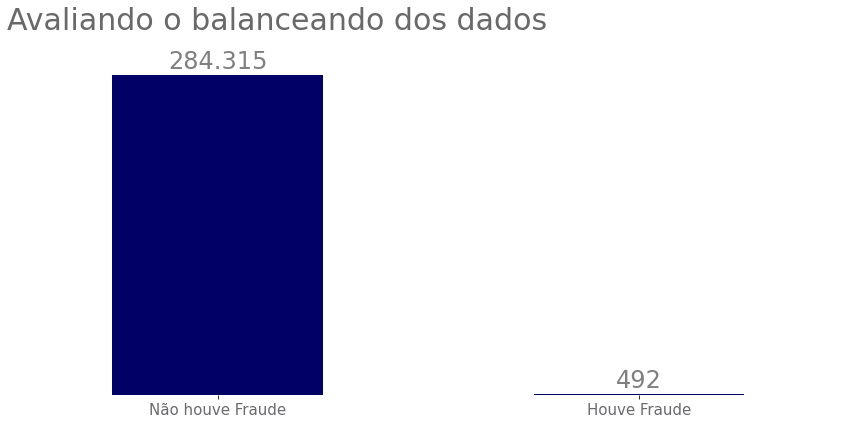

In [8]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,6))

#pegando a contagem de valores da variável Class
df.Class.value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando o balanceando dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels(df.Class,df.Class.value_counts())


#plotando o gráfico
plt.tight_layout();

In [9]:
#avaliando quanto de fraude houve pela porcentagem
nao_fraude = df[df.Class == 1].shape[0] / df.Class.shape[0]
print('Os dados que são provenientes de fraudes representam cerca de: {:.2f}% de nossa base.'.format(nao_fraude*100))

Os dados que são provenientes de fraudes representam cerca de: 0.17% de nossa base.


*Pelo gráfico acima observamos que existem muito mais dados relacionados a transações **corretas** do que fraudosas.Um algoritmo que simplesmente optasse por considerar todas transações como corretas teria grande **eficácia**. Porém, este mesmo algoritmo traria grandes **transtornos** aos clientes que foram vítimas de fraude.*

*É costume em Data Science chamar estes dados que possuem grande diferença entre as classes como dados **desbalanceados**. Nesta nossa análise, nosso foco maior está na classe **Houve Fraude**, portanto teremos que reajustar nossos dados para poder criar **modelos** de machine learning mais adequados.*

*Caso queira ter mais informações sobre dados desbalanceados, busque aqui [Dados Desbalanceados](https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b).*

### Analisando os dados através de histogramas

#### Histograma da Variável Time

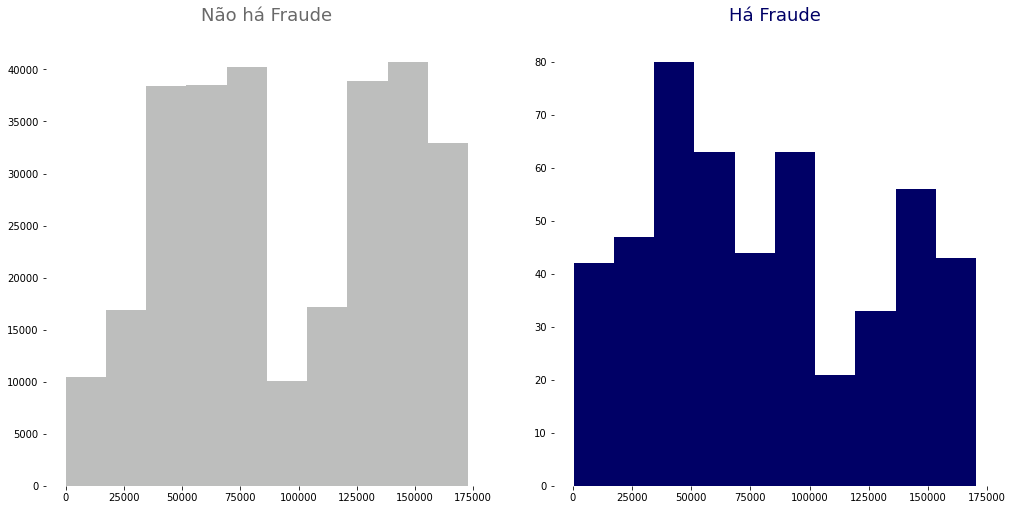

In [10]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável time quando não há fraude
ax[0].hist(df['Time'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável time quando não há fraude
ax[1].hist(df['Time'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})


#plotando o gráfico
plt.tight_layout(pad=4.0);

*Um [histograma](https://www.alura.com.br/artigos/o-que-e-um-histograma) representa a distribuição de frequência de uma variável. Podemos perceber que a variável **Time** tem comportamentos semelhantes quando existem transações fraudosas ou corretas. No entanto, quando existe uma fraude as operações são um pouco **mais rápidas** se comparado a quando não houve fraude.*

#### Histograma da Variável Amount

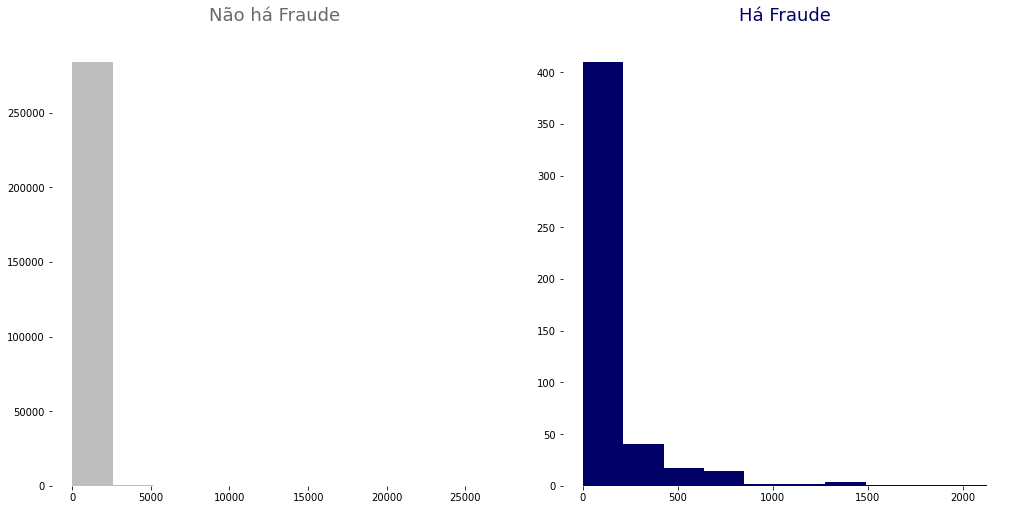

In [11]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável Amount quando não há fraude
ax[0].hist(df['Amount'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável Amount quando não há fraude
ax[1].hist(df['Amount'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})

#plotando o gráfico
plt.tight_layout(pad=4.0);

*Um [histograma](https://www.alura.com.br/artigos/o-que-e-um-histograma) representa a distribuição de frequência de uma variável. Podemos perceber que na variável **Amount** as fraudes ocorrem com valores **menores**, tanto é que o range considerado vai apenas até 2.000.*

### Avaliando o boxplot da variável Amount

*O maior transtorno aos banco é quando **existem** fraudes. Desta forma, é muito importante ver como **apenas** os valores correspondentes a transações fraudosas se **comportam**.*

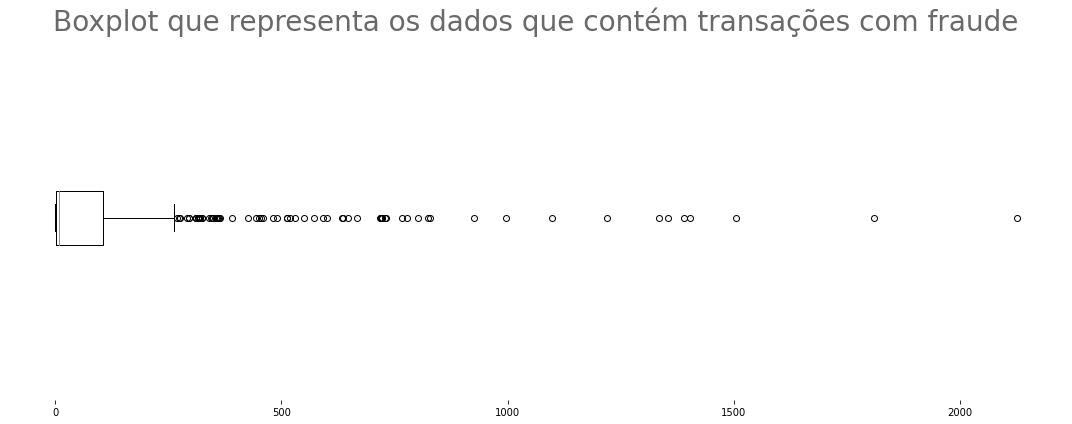

In [12]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(16,6))

#criando o boxplot
ax.boxplot(df['Amount'][df.Class ==1],vert=False)

#melhorando o layout
ax.set_frame_on(False)
ax.set_title('Boxplot que representa os dados que contém transações com fraude',loc='center',color='dimgrey',fontdict={'fontsize':28})
ax.get_yaxis().set_visible(False)

#plotando o gráfico
plt.tight_layout();


In [13]:
#verificando os dados estatisticos
primeiro_quartil = df['Amount'].quantile(0.25)
terceiro_quartil = df['Amount'].quantile(0.75)
intervalo_interquartilico = terceiro_quartil - primeiro_quartil
maximo = terceiro_quartil + (1.5*intervalo_interquartilico)

#contabilizando a quantidade de outliers em comparação ao total de dados
porcentagem = df[df['Amount'] > maximo].shape[0] / df.shape[0]
print('Dentre os dados com fraude, aproximadamente {:.0f}% são considerados como outliers. A maioria está abaixo de {:.2f}, que representa o valor do terceiro quartil.'.format((porcentagem*100),terceiro_quartil))

Dentre os dados com fraude, aproximadamente 11% são considerados como outliers. A maioria está abaixo de 77.16, que representa o valor do terceiro quartil.


*Pelo boxplot percebemos que existe uma quantidade não tão grande de **outliers** (cerca de 11% dos valores fraudosos). Tendo isto em vista, um **modelo** que se propusesse a apenas considerar valores **extravagantes** não corresponderia aos dados da realidade.*

In [14]:
#avaliando qual o valor médio nas fraudes
valor_medio = df['Amount'].mean()

#qual o maior valor de fraude
maior_valor = max(df['Amount'])

#impressão dos valores
print('O valor médio das transações em que ocorreram fraude foi de {:.2f} e o maior valor destas transações foi de {:.2f}.'.format(valor_medio,maior_valor))

O valor médio das transações em que ocorreram fraude foi de 88.35 e o maior valor destas transações foi de 25691.16.


### Matriz de Correlação

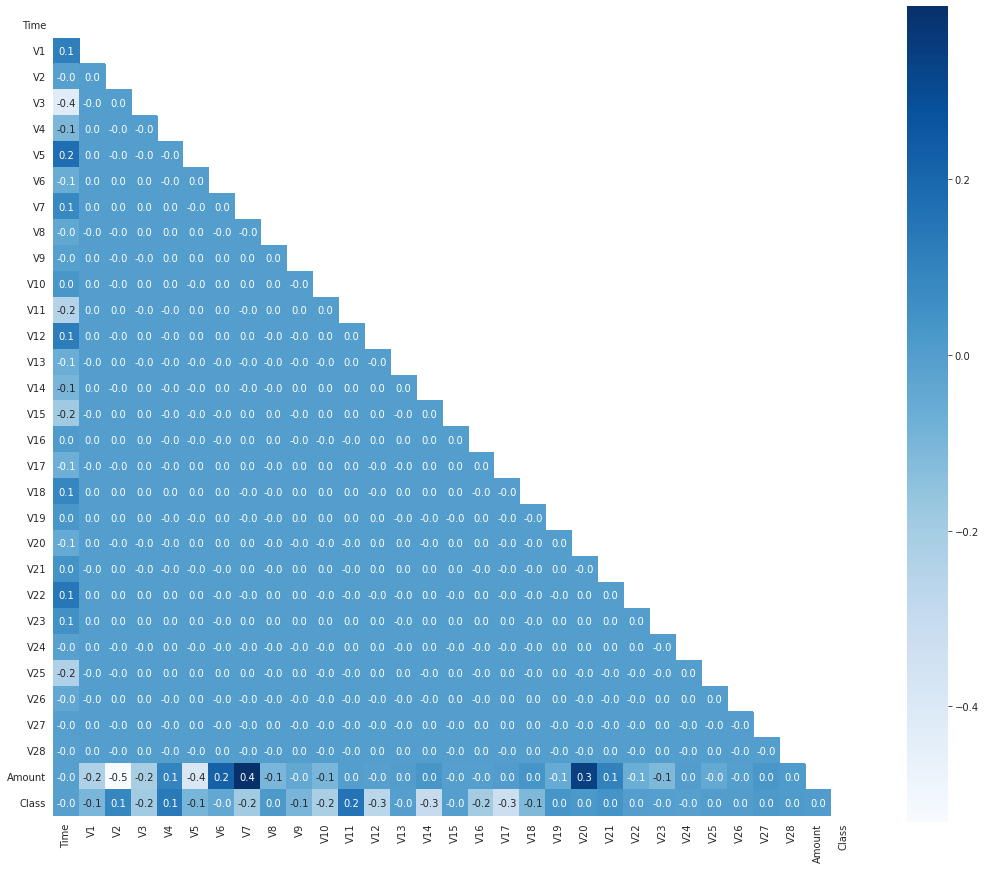

In [15]:
#criando a matriz de correlacao
matriz_de_correlacao = df.corr()

#criando uma máscara
mask = np.zeros_like(matriz_de_correlacao)  # <- cria uma matriz de mesmo tamanho, mas com todos elementos sendo igual a zero
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from <- retorna o indice dos elementos da matriz triangular superior

#plotando a matriz de correlacao
with sns.axes_style('white'):
  f,ax = plt.subplots(figsize=(18,15))
  ax = sns.heatmap(matriz_de_correlacao,mask=mask, square=True,cmap='Blues',annot=True,fmt='.1f')

*Um conceito importante na construção do heatmap das **matrizes de correlação** é a [Matriz Triangular](https://pt.wikipedia.org/wiki/Matriz_triangular). Desta forma construímos anteriormente em nosso código uma **máscara** para eliminar os valores duplicados, ou seja, apenas **uma** vez será apresentado a correlação entre V19 e V28, por exemplo.*

*Correlação é uma **relação estatística** entre duas variáveis (podendo ser causal ou não). A tabela abaixo apresenta as **interpretações** que podem ser feitas a partir do cálculo do [Coeficiente de Correlação de Pearson](http://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf) de nossos dados.*

<p align=center>
<img src="https://minio.scielo.br/documentstore/1982-4351/pD8ZJN9LPWZjxyg9Nn7KSYQ/00a1935b704e192ea9d084bb90a8327a421142e9.jpg" loc="center"></p>

*Pela análise de nossa **matriz de correlação** podemos observar que grande parte dos coeficientes apresentam uma correlação **moderada** entre as variáveis. Além disso, por se tratarem de variáveis que passaram por um processo de tratamento de dados **(PCA)** não conseguimos tirar boas **conclusões** entre as relações das variáveis. Também, podemos observar que existe uma correlação muito fraca entre as features Amount e Time.*

## Preparação dos Dados para os modelos de Machine Learning

*Quando anteriormente nós utilizamos o método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) do pandas percebemos que as variáveis Time e Amount não estavam **normalizadas**. Portanto, para uma melhor perfomance de nossos modelos de machine learning é importante **evitar** os grandes **ranges** destas features.* 

*Uma método utilizado para **padronizar** os dados é o [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). A fórmula realizada por este scaler para **calcular** cada nova variável está ilustada abaixo:*

\begin{align}
z = \frac{(x-u)}{s}
\end{align}

*Onde:*
> * *x é o valor original*
> * *z é o valor padronizado*
> * *u é a média dos valores da variável analisada*
> * *s é o desvio padrão dos valores da variável analisada*

In [16]:
#inicialização do normalizador de dados
scaler = StandardScaler().fit(df[['Time','Amount']])

#substituir os dados antigos para dados normalizados
df[['Time','Amount']] = scaler.transform(df[['Time','Amount']])

*Naturalmente, não podemos utilizar **toda** a nossa base de dados para treinas nossos modelos. Isso provavelmente geraria uma fenômeno chamado de [overfitting](https://www.ibm.com/cloud/learn/overfitting). Consequentemete, é necessário realizar a **separação** das informações entre dados de treino e dados de teste.*

*Uma maneira de realizar esta separação **facilmente** é utilizar o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do scikit-learn. Este método separa os dados de forma **aleatória** entre elementos de treino e teste. Por **padrão**, o tamanho (quantidade de dados) dos valores que correspondem aos dados de teste representam **25%** da quantidade total de dados. Além disso, também é possível **estratificar** este método pelo parâmetro [stratify](https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter), ou seja, ele irá preservar a proporção da variável **alvo** nos dados de treino e de teste.*

In [17]:
#separar as variáveis x e y
x = df.drop('Class',axis=1)
y=df.Class

#divindo o dataset em dados de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

*Constatamos anteriormente que os dados **não** estavam balanceados e isso poderia **prejudicar** o aprendizado de nossos modelos. Desta forma, é necessário utilizar alguma **ferramenta** que consiga balancear nosso dataset.*

*Mas antes de balancear nossos dados devemos refletir: **Quais dados são de nosso interesse? Os que representam a maioria dos valores ou a minoria**?*

*Para tentar **solucionar** este problema, geralmente existem duas grandes técnicas:*

*Oversampling: Consiste em adicionar cópias das observações da classe de **minoritária** (a de menor ocorrência)*

*Undersampling: Consiste em **reduzir** de forma aleatória os exemplos da classe **majoritária** (a que tem mais elementos). Desta forma, ele **preserva** as características da classe minoritária.*

*Analisando nosso **objetivo** principal: descobrir quais transações são **fraudosas** e podem gerar **falsos** positivos, as estratégias de undersampling se parecem mais adequados ao nosso **propósito**.*

*Uma técnica **muito** utilizada para solucionar estes casos com **desbalanceamento** do tipo undersampling é o [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).*

In [18]:
#usando uma técnica de undersampling -> elimina aleatoriamente entrada da classe com maior número de ocorrências
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_sample(x_train,y_train)

#### Visualizando a Distribuição dos Dados balanceados

In [19]:
#funcao feita para colocar o rotulo de dados em balanceados
def addlabels_balanceados(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 15,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

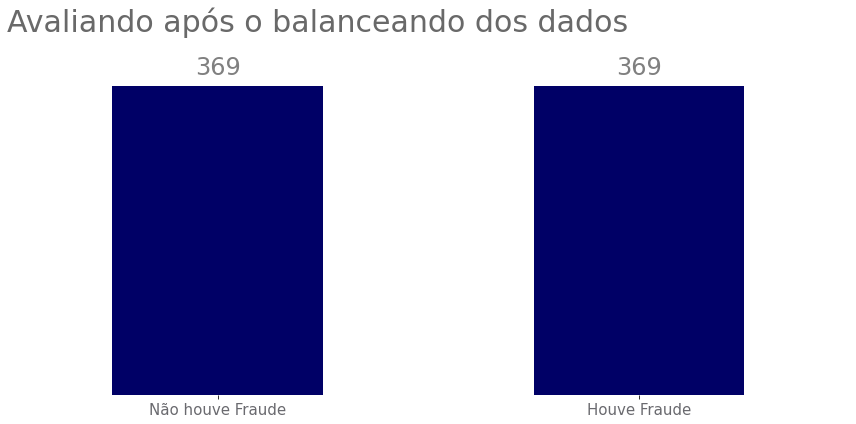

In [20]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,6))

#pegando a contagem de valores da variável Class
pd.Series(y_rus).value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando após o balanceando dos dados',loc='left',pad=40,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels_balanceados(y_rus,pd.Series(y_rus).value_counts())

#plotando o gráfico
plt.tight_layout();

*Após a utilização da técnica **RandomUnderSampler**, constatamos que os valores de nossos dados de **treino** estão extremamente balanceados.*

## Modelos de Machine Learning

*Um modelo é dito do tipo **supervisionado** quando a nossa base de dados já contém a **saída** de dados corretas, ou seja, nosso dataset possui valores alvos correspondentes como **vetores** de saída. No nosso caso analisado a coluna **Class** representa se a transação foi fraudada ou normal. Portanto, já sabemos de **antemão** se houve crime naquele tipo de transação*

*Como nosso objetivo (vetor alvo) é saber se houve algum tipo de fraude em transações financeiras **desconhecidas**, então o nosso modelo de machine learning pode aprender com os dados antigos e a partir disso **predizer** a situação de transações novas se **baseando** no conhecimento adquirido pela nossa base de dados. Portanto, ele será um modelo supervisionado porque se baseará em vetores de saída anteriormente rotulados.*

*Já um modelo de **classificação** do tipo **supervisionado** é quando o algoritmo tem como objetivo **classificar** itens ou amostras de acordo com as características **observadas** no banco de dados considerando já conhecido o vetor-alvo.*

*Dependendo do tipo de **algoritmo** utilizado ele pode retornar a **probabilidade** da nova entrada pertencer a determinada classe ou diretamente a qual classe ele pertence (não apresentando a probabilidade).*

*Em nosso caso analisado, um algoritmo de **classificação** pode retornar sua uma operação foi **fraudada** (sim ou não) considerando as demais variáveis de entrada, como as colunas **Time** e **Amount**.*

*Para melhor avaliar um modelo de classificação podemos utilizar a **matriz de confusão**. A matriz de confusão é uma tabela com duas linhas e duas colunas que demonstram  a **frequência** de falsos postivios, falsos negativos, verdadeiros positivos e verdadeiros negativos.*


<p align="center">
<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg"
 width="50%">
</p>

**Tipos de erros apontados na matriz de confusão:**

* **Verdadeiro positivo (*true positive* — TP):** *O modelo previu que haveria fraude e a resposta é que houve fraude.*

* **Falso positivo (*false positive* — FP):** *Quando não houve fraude na transação e o modelo classifica como uma transação fraudosa.*

* **Falso negativo (*true negative* — TN)**: *O modelo previu que não houve fraude e a resposta é que não houve fraude.*

* **Verdadeiro negativo (*false negative* — FN):** *Quando houve uma fraude na transação e o modelo classifica que não houve fraude.*



*É importante ressaltar que temos que ter o conhecimento se  estes modelos **classificaram** de forma correta ou não os **dados desconhecidos**. Por conta disso, é **indispensável** ter indicadores que atestam a **eficácia** do algoritmo. Alguns bons indicadores conhecidos que avaliam os modelos de classificação são:*
* *precision: é utilizada para indicar a relação entre as previsões positivas realizadas corretamente e todas as previsões positivas (incluindo as falsas). Ela pode ser calculada como:*
\begin{align}
precision = \frac{TP}{TP+FP}
\end{align}

* *recall: está relacionado a proporção de positivos que foram identificados corretamente, ou seja, demonstra quão bom o modelo é em prever positivos, sendo positivos a classe que se quer prever. Ele pode ser calculado como:*
\begin{align}
recall = \frac{TP}{TP+FN}
\end{align}

* *f1-score: é a média harmônica entre a precision e o recall.*
* *support: é o número de ocorrências da classe especificada no conjunto de dados. Ou seja, se for uma transação fraudosa será o número de elementos que representam uma transação fraudosa na base de dados de teste.*
* *accuracy: mede a exatidão ou rigor do modelo de classificação de maneira geral. Ela mostra diretamente a porcentagem de acertos do algoritmo.*
$$
\text{accuracy} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$


* *AUC: é uma métrica que mede o quão bem o modelo separa as classes da variável resposta baseado na sua distribuição acumulada. Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1*

### Regressão Logística

*É um dos algoritmos mais **utilizados** para modelar variáveis categóricas. Este é um método que nos permite estimar a **probabilidade** associada à ocorrência de determinado evento em face da atuação das **outras** variáveis que influenciam a variável-alvo, que em nosso caso é a coluna **Class**.*

*As aplicações da regressão logística são **variadas** e vão para áreas bem abrangentes, tais como: marketing, propaganda e internet. Além disso, ela também é utilizada na aplicação da lei (direito) e **detecção de fraudes**, na assistência médica e nos estudos da força de trabalho e **riscos financeiros**.*

*As principais **vantagens** da regressão logística são:*
* *fornece resultados em termos de probabilidade.*
* *facilidade para lidar com variáveis independentes categóricas.*
* *facilidade de classificação de indivíduos em categorias.*
* *É necessário um pequeno número de suposições.*
* *Alto grau de confiabilidade.*


Principais referências teóricas deste estudo: [Regressão Logística - e-disciplinas USP](https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf), [Regressão Logística - Felipe Micail da Silva Smolski](https://smolski.github.io/livroavancado/reglog.html).


In [21]:
#instanciando o modelo
lr = LogisticRegression()

#realizando o treinamento do modelo
lr.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_lr = lr.predict(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_lr,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.05      0.89      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202



#### Matriz de Confusão da Regressão Logística

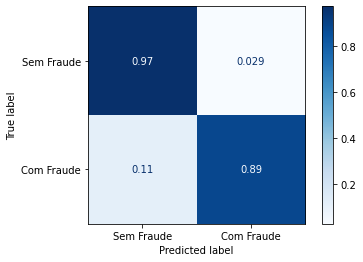

In [22]:
plot_confusion_matrix(lr,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

### Decision Tree

*Decision Trees, ou **árvores de decisão**, são modelos de machine learning do tipo supervisionado muito utilizados para situações de classificação devido ao seu **fácil** entendimento e por apresentar bons **resultados** em diferentes banco de dados. Ela se baseia nas variáveis disponíveis pelo problema para criar **nós** (cada ponto de decisão) e **ramos** que são desdobrados destas decisões.*

*Na imagem abaixo, por exemplo,em que consideramos um **modelo** para predizer se nós jogaremos golfe ou não em algum dia específico, o nó **Windy** ajuda a determinar se foi jogado golfe naquele dia.*


<p align="center"><img src="https://www.saedsayad.com/images/Decision_Tree_1.png">
</p>

*Este algoritmo é utilizado em **muitas** áreas de nossa vida, tais como: engenharia, marketing, classificação de clientes, diagnósticos de doenças e detecção de fraudes.*

*As principais **vantagens** das árvores de decisão são:*
* *É um modelo de fácil compreensão dos resultados.*
* *É capaz de funcionar mesmo havendo valores ausentes no dataset.*
* *Outliers não causam grande impacto.*
* *Dá a posibilidade de representar visualmente o processo de decisão.*
* *É não-paramétrico. As variáveis independentes não precisam seguir determinadas distribuições probabilísticas para o algoritmo funcionar.*

*Principais referências teóricas deste estudo: [Decision Tree - Didatica Tech](https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/), [Decision Tree Algorithm - Upgrad](https://www.upgrad.com/blog/guide-to-decision-tree-algorithm/).*

In [23]:
#instanciando o modelo
dtc = DecisionTreeClassifier()

#realizando o treinamento do modelo
dtc.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_dtc = dtc.predict(x_test)
y_proba_dtc = dtc.predict_proba(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_dtc,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.88      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.89      0.49     71202
weighted avg       1.00      0.90      0.95     71202



#### Matriz de Confusão da Decision Tree Classifier

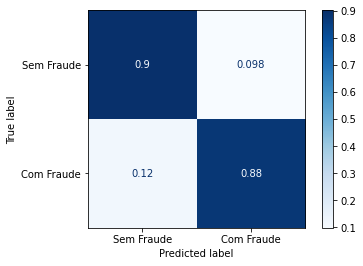

In [24]:
plot_confusion_matrix(dtc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

#### Plotando a árvore de decisão

*Este modelo cria internamente uma representação **gráfica** das alternativas que são disponibilizadas pelo modelo. Dessa forma, algo semelhante ao um **fluxograma** é criado com o objetivo de descobrir a **classificação** de uma nova entrada.*

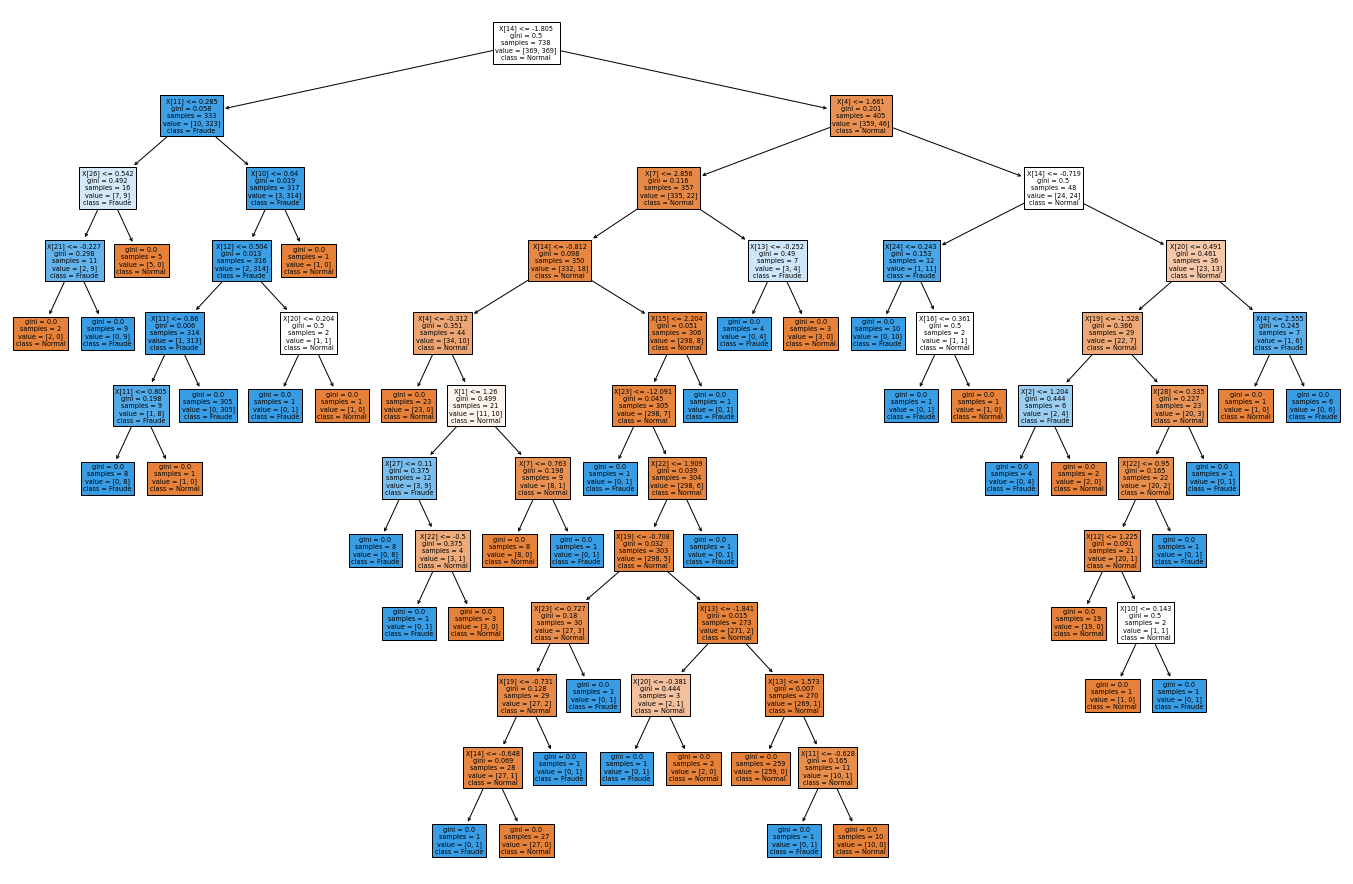

In [25]:
fig= plt.figure(figsize=(24,16))
ax = plot_tree(dtc,filled=True,class_names=["Normal","Fraude"]);

### Random Forest


*O Random Forest, ou **floresta aleatória**, é um algoritmo de machine learning baseado nos **métodos ensemble**. Ou seja, isso significa que este modelo, na verdade, é a combinação de vários modelos que geram um único resultado. Isso exige do computador maior processamento, porém traz respostas mais robustas e complexas.*

*No caso específico do **Random Forest**, ele utiliza como a base a criação de **várias** árvores de decisão. Inicialmente, é selecionado aleatoriamente a variável a ser considerada como **nó inicial**. A partir disso, os resultados são analisados e a **melhor** árvore de decisão para aquele conjuntos teste de dados é escolhida.*

*Este poderoso **algoritmo** de machine learning é muito utilizado para: recomendações de produtos em e-commerce, diagnósticos de doenças, segmentação de clientes e detecção de fraudes.*

*As principais **vantagens** do Random Forest são:*
* *É um bom algoritmo para evitar o over-fitting.*
* *É capaz de funcionar com datasets grandes e com alta dimensionalidade.*
* *Pode ser utilizado para tarefa de regressão e classificação*
* *Tem reconhecido alto nível de acurácia em muitos casos.*


*Principais referências teóricas deste estudo: [Random Forest - Didatica Tech](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/), [Applications of Random Forest- IQ.opengenus](https://iq.opengenus.org/applications-of-random-forest/), [Random Forest Algorithm- An Overview](https://www.mygreatlearning.com/blog/random-forest-algorithm/) e [Random Forest- Barbon](http://www.barbon.com.br/wp-content/uploads/2016/04/FundamentosInteligenciaArtificial-3.pdf)*

In [26]:
#instanciando o modelo
rfc = RandomForestClassifier()

#realizando o treinamento do modelo
rfc.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_rfc = rfc.predict(x_test)
y_proba_rfc = rfc.predict_proba(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_rfc,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.88      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



#### Matriz de Confusão do Random Forest

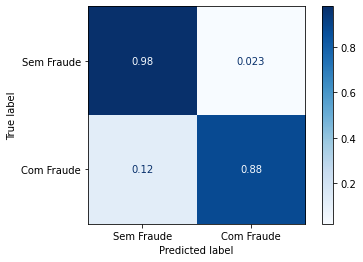

In [27]:
plot_confusion_matrix(rfc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

### SVC

*SVM (Support Vector Machine) é um algoritmo de machine learning que geralmente é utilizado para atividades que envolvam **classificação** ou regressão. Ele foi extremamente popular nos **anos 90** e continua a ser um método que atinge **alta** perfomance sem a necessidade de [tunar](https://en.wikipedia.org/wiki/Hyperparameter_optimization) muito os parâmetros.* 

*O foco neste estudo é abordar o **SVC** (Support Vector Classification).De forma resumida, este modelo se baseia na construção de um **hiperplano** que melhor diferencia duas classes.*

*Cada item de nossa base de dados é representado como um **ponto** no espaço (em um espaço n-dimensional, onde n é a **quantidade de variáveis** independentes) onde o valor de cada ponto está relacionado ao **valor** da variável analisada. Dessa forma, o algoritmo busca calcular o melhor hiperplano que consegue diferenciar duas classes distintas.*

<p align="center"><img src="https://miro.medium.com/max/2000/1*z_B0o4JbD0C6gpmcenUc4w.jpeg" width="50%"></p>


*As principais **vantagens** do SVC são:*
* *É eficaz nos casos em que o número de dimensões é maior que o número de amostras.*
* *Não exige grande processamento e memória do computador.*
* *Atinge alta perfomance sem a necessidade de grandes turnings*

*Fontes de Estudo: [Support Vector Machine - Diego Addan](https://www.inf.ufpr.br/dagoncalves/IA07.pdf) , [SUPPORT VECTOR MACHINES(SVM)](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589) e [Real-Life Applications of SVM (Support Vector Machines)](https://data-flair.training/blogs/applications-of-svm/)*


In [28]:
#instanciando o modelo
svc = SVC()

#realizando o treinamento do modelo
svc.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_svc = svc.predict(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_svc,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.86      0.17       123

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.58     71202
weighted avg       1.00      0.99      0.99     71202



#### Matriz de Confusão do SVC

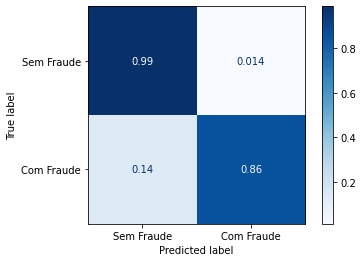

In [29]:
plot_confusion_matrix(svc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

### Plotando as 4 matrizes de confusão

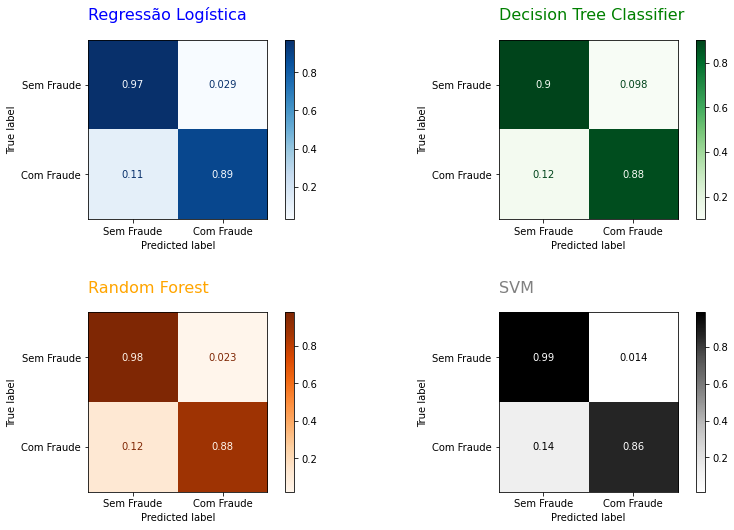

In [30]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)

#primeiro gráfico - regressão logística
plot_confusion_matrix(lr,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude'],ax=ax[0][0])
ax[0][0].set_title('Regressão Logística',loc='left',pad=20,fontdict={'fontsize':16},color='blue')

#segundo gráfico - decision tree classifier
plot_confusion_matrix(dtc,x_test,y_test,normalize='true',cmap=plt.cm.Greens,display_labels=['Sem Fraude','Com Fraude'],ax=ax[0][1])
ax[0][1].set_title('Decision Tree Classifier',loc='left',pad=20,fontdict={'fontsize':16},color='green')

#terceiro gráfico - Random Forest
plot_confusion_matrix(rfc,x_test,y_test,normalize='true',cmap=plt.cm.Oranges,display_labels=['Sem Fraude','Com Fraude'],ax=ax[1][0])
ax[1][0].set_title('Random Forest',loc='left',pad=20,fontdict={'fontsize':16},color='orange')

#quarto gráfico - SVM
plot_confusion_matrix(svc,x_test,y_test,normalize='true',cmap=plt.cm.Greys,display_labels=['Sem Fraude','Com Fraude'],ax=ax[1][1])
ax[1][1].set_title('SVM',loc='left',pad=20,fontdict={'fontsize':16},color='grey')

#plotando os gráficos
plt.tight_layout(pad=3.0);

*Analisando a matriz de confusão dos quatro modelos de machine learning podemos constatar que:*

* *O Decision Tree apresenta o maior número de **falsos positivos**.*

## Avaliando o desempenho dos modelos de Machine Learning

*Para este tipo de negócio uma das melhores métricas que podem ser utilizadas (além dos falsos positivos) para se avaliar os modelos são: recall e o [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772).*


In [31]:
#dicionario dos indicadores de avalicao
modelos = ['Logística','Decion Tree','Random Forest','SVC']
indicadores = {
             'Recall':[classification_report(y_test,y_pred_lr,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_dtc,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_rfc,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_svc,digits=2,output_dict=True)['1']['recall']],
             'AUC':[roc_auc_score(y_test,y_pred_lr),roc_auc_score(y_test,y_pred_dtc),roc_auc_score(y_test,y_pred_rfc),roc_auc_score(y_test,y_pred_svc)],
             'Falsos positivos':[confusion_matrix(y_test,y_pred_lr,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_dtc,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_rfc,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_svc,normalize='true')[0][1]]}

In [32]:
#criando um DataFrame do pandas para melhor visualização
pd.DataFrame(indicadores,index=modelos).sort_values(['Falsos positivos','AUC'],ascending=[True,False]).round(2)

,Recall,AUC,Falsos positivos
SVC,0.86,0.92,0.01
Random Forest,0.88,0.93,0.02
Logística,0.89,0.93,0.03
Decion Tree,0.88,0.89,0.10


*Analisando a tabela acima podemos observar que o **melhor** modelo para este banco de dados se mostrou o **SVC**, já que ele não em o maior número de **falsos positivos** e apresenta o maior **AUC** depois desta condição.*

### Melhorias Futuras

*Nos exemplos acima, para **todos** os modelos, foram utilizados os [hiperparâmetros](https://www.jeremyjordan.me/hyperparameter-tuning/) **padrão** dos algoritmos. No entanto, cada banco de dados tem sua particularidade e necessita de **hiperparâmetros** próprios para o aumento de sua perfomance.* 

## Conclusões

* *A construção de um modelo de machine learning é aparentemente simples. No entanto, o que verdadeiramente importa para um bom uso desta ferramenta é entender o modelo do negócio.*
* *Companhias financeiras são detentoras de grande bases de dados. Aqui só foram analisados dois dias úteis. Certamente, os algoritmos teriam um melhor desempenho se fosse possível avaliar os últimos 05 anos da empresa.*
* *Pelos resultados dos modelos a aplicação de inteligência artificial se mostra muito produtiva para a gestão das transações em uma empresa.*
* *Antes de instanciar os algoritmos de machine learning é necessária avaliar a situação atual dos dados. Analisar quantos dados estão ausentes, se eles estão balanceados, etc.*
* *Para este banco de dados específico, um dos melhores algoritmos construídos foi o SVC, apresentando cerca de 92% em seu AUC e 1% de falsos positivos*